### **Model selection and Training**

In this notebook, we train multiple machine learning models to predict customer churn.
We compare their performance using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
We also perform hyperparameter tuning to improve the model performance and choose the best algorithm.

**Models used:**

Logistic Regression

K-Nearest Neighbors (KNN)

Random Forest

XGBoost

CatBoost

Tuned versions of all applicable models

The goal is to identify the best performing model for churn prediction.

## Importing Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Evaluating Model Function

**Unified Evaluation Function**

To keep the model comparison consistent, we define a single evaluation function that calculates:

Confusion Matrix

Precision, Recall, F1-Score

Overall Accuracy

ROC-AUC (if supported)

This avoids repeating the same code for every model.

In [208]:
# ---------------------
# 1. Import Libraries
# ---------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# ... other imports

# ---------------------
# 2. Define Evaluation Function
# ---------------------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc=accuracy_score(y_test, y_pred)
    print("Accuracy Score:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    except:
        print("ROC-AUC not available (model has no predict_proba)")
    return acc

## Load the train and test Data

In [186]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

X_train = train.drop("target", axis=1).values
y_train = train["target"].values

X_test = test.drop("target", axis=1).values
y_test = test["target"].values

In [187]:
print(X_train)
print(y_train)

[[ 1.          0.          0.         ...  0.          0.68335531
   1.6451907 ]
 [ 0.          0.          1.         ...  1.          0.35266521
  -0.81736575]
 [ 1.          0.          0.         ...  0.         -1.50850521
  -0.95361907]
 ...
 [ 0.          1.          0.         ...  0.         -0.80558103
  -0.09833661]
 [ 0.          0.          1.         ...  0.         -1.32072641
  -0.34532328]
 [ 1.          0.          0.         ...  1.          0.16322465
  -0.95093276]]
[0 1 0 ... 0 0 1]


## Logistic Regression

Logistic Regression is a simple and interpretable classification model.
It works well as a baseline and helps us understand feature relationships.

We train the model on scaled numerical + encoded categorical data and evaluate performance.

In [209]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [210]:
lr_acc=evaluate_model(lr, X_test, y_test)

Accuracy Score: 0.7341862117981521
Confusion Matrix:
 [[1033    0]
 [ 374    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

ROC-AUC Score: 0.44525575785185145


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## K- Nearest Neighbour

KNN is a distance-based algorithm.
It predicts class labels based on the majority vote of nearest neighbors.

It is sensitive to:

Feature scaling

High dimensionality

Choice of k value

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [212]:
knn_acc = evaluate_model(knn, X_test, y_test)

Accuracy Score: 0.7093105899076049
Confusion Matrix:
 [[985  48]
 [361  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83      1033
           1       0.21      0.03      0.06       374

    accuracy                           0.71      1407
   macro avg       0.47      0.49      0.44      1407
weighted avg       0.59      0.71      0.62      1407

ROC-AUC Score: 0.6095881369356685


## Random Forest

Random Forest is an ensemble of decision trees trained using bagging.
It handles nonlinear relationships and works well on structured data.

Advantages:

Robust to noise

Handles categorical encoding

Provides feature importance

We evaluate both default and tuned versions.

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [214]:
rf_acc = evaluate_model(rf, X_test, y_test)

Accuracy Score: 0.7931769722814499
Confusion Matrix:
 [[922 111]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC-AUC Score: 0.8281664949707771


### Random Hyperparameter Tuning

In [194]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
print("Best Params:", rf_grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [195]:
best_rf = RandomForestClassifier(**rf_grid.best_params_)
best_rf.fit(X_train, y_train)

print("\n--- Tuned Random Forest Performance ---")
best_rf_acc = evaluate_model(best_rf, X_test, y_test)


--- Tuned Random Forest Performance ---
Accuracy Score: 0.8052594171997157
Confusion Matrix:
 [[934  99]
 [175 199]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

ROC-AUC Score: 0.8409505049929854


## XG BOOST

XGBoost is a gradient boosting algorithm optimized for speed and performance.
It performs exceptionally well for tabular data and handles class imbalance effectively.

We train both:

Base model

Tuned model using RandomizedSearchCV

In [196]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=400,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [197]:
xgb_acc = evaluate_model(xgb, X_test, y_test)

Accuracy Score: 0.7910447761194029
Confusion Matrix:
 [[907 126]
 [168 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC-AUC Score: 0.8176175512887546


### XGBoost Hyperparameter Tuning

In [198]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [200, 300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 5, 10]
}

xgb_model = XGBClassifier(
    eval_metric='logloss',
    objective='binary:logistic',
    use_label_encoder=False,
    nthread=-1
)

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
xgb_random.fit(X_train, y_train)

print("\nBest XGBoost Parameters:", xgb_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:48:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Parameters: {'subsample': 0.6, 'reg_lambda': 10, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.8}


In [199]:
best_xgb = XGBClassifier(
    **xgb_random.best_params_,
    eval_metric='logloss',
    use_label_encoder=False
)

best_xgb.fit(X_train, y_train)

print("\n--- Tuned XGBoost Performance ---")
best_xgb_acc = evaluate_model(best_xgb, X_test, y_test)



--- Tuned XGBoost Performance ---
Accuracy Score: 0.8045486851457001
Confusion Matrix:
 [[930 103]
 [172 202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC Score: 0.8427429583115478


## CatBoost

CatBoost is a gradient boosting model that performs particularly well with categorical features.
It uses ordered boosting and prevents overfitting.

It generally performs strongly even without heavy tuning.

In [200]:
!pip install catboost


In [201]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=0
)

cat.fit(X_train, y_train)

In [202]:
cat_acc = evaluate_model(cat, X_test, y_test)

Accuracy Score: 0.7697228144989339
Confusion Matrix:
 [[910 123]
 [201 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.46      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407

ROC-AUC Score: 0.8041993881069106


### CatBoost Hyperparameter Tuning

In [203]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    silent=True,
    loss_function='Logloss',
    eval_metric='Accuracy'
)

cat_param_grid = {
    'iterations': [300, 500, 800, 1000],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.1, 0.3, 0.5, 1],
    'border_count': [32, 64, 128]
}

cat_random = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
cat_random.fit(X_train, y_train)

print("\nBest CatBoost Parameters:", cat_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best CatBoost Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 800, 'depth': 4, 'border_count': 64, 'bagging_temperature': 1}


In [204]:
best_cat = CatBoostClassifier(
    **cat_random.best_params_,
    silent=True,
    loss_function='Logloss',
    eval_metric='Accuracy'
)

best_cat.fit(X_train, y_train)

print("\n--- Tuned CatBoost Performance ---")
best_cat_acc = evaluate_model(best_cat, X_test, y_test)


--- Tuned CatBoost Performance ---
Accuracy Score: 0.7917555081734187
Confusion Matrix:
 [[898 135]
 [158 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

ROC-AUC Score: 0.8458632506949801


# Model Comparison

We compare all models using a single table of metrics to identify the best-performing classifier.

Metrics included:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

This helps us finalize the winning model for deployment.

In [205]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "KNN", "Random Forest", "Random Forest (Tuned)",
              "XGBoost", "XGBoost (Tuned)", "CatBoost", "CatBoost (Tuned)"],

    "Accuracy": [
        lr_acc, knn_acc, rf_acc, best_rf_acc,
        xgb_acc, best_xgb_acc, cat_acc, best_cat_acc
    ]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy
0,Logistic Regression,0.734186
1,KNN,0.709311
2,Random Forest,0.793177
3,Random Forest (Tuned),0.805259
4,XGBoost,0.791045
5,XGBoost (Tuned),0.804549
6,CatBoost,0.769723
7,CatBoost (Tuned),0.791756


/tmp/ipython-input-2261041710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results['Model'], y=df_results['Accuracy'], palette='viridis')


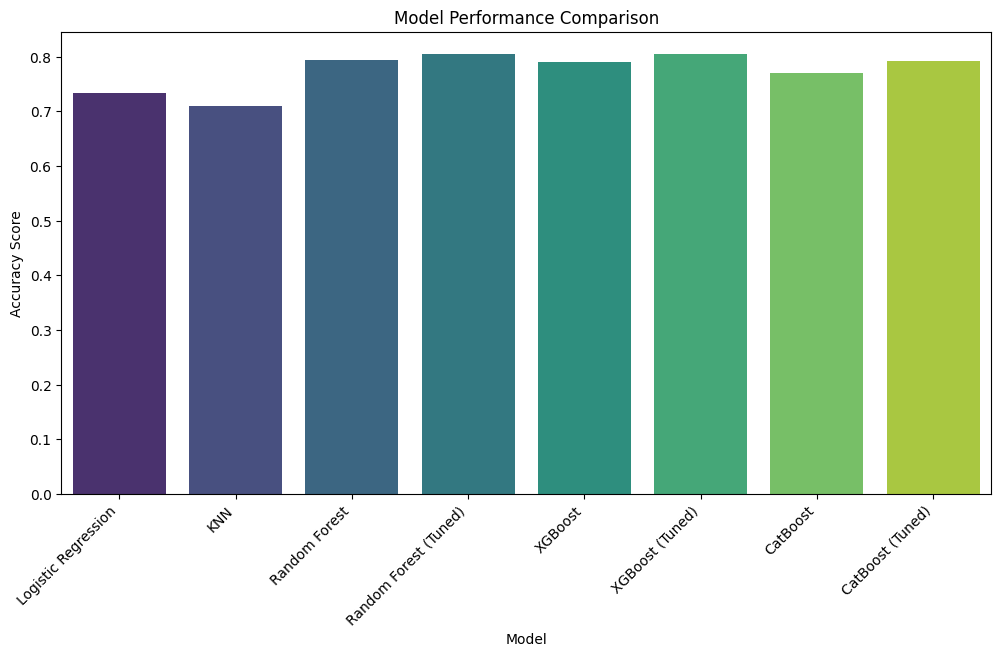

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=df_results['Model'], y=df_results['Accuracy'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()


In [207]:
best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_model_acc = df_results['Accuracy'].max()

print("Best Model:", best_model_name)
print("Best Accuracy:", best_model_acc)


Best Model: Random Forest (Tuned)
Best Accuracy: 0.8052594171997157


In [228]:
# Store all models in a dictionary
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "Random Forest": rf,
    "Random Forest (Tuned)": best_rf,
    "XGBoost": xgb,
    "XGBoost (Tuned)": best_xgb,
    "CatBoost": cat,
    "CatBoost (Tuned)": best_cat
}

# Find best model name from results table
best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]   # ← THIS IS THE REAL MODEL

print("Best Model:", best_model_name)

# Save the best model
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Best Model: Random Forest (Tuned)
